In [243]:
import random
import conf
import importlib

importlib.reload(conf)
from conf import *

In [244]:
p = {"beta": 10, "J": 1, "L": 10}
k = kinks(**p)

In [245]:
beta = p["beta"]
lam = p["J"] / 4.0
L = p["L"]
points = [
    gen_uniformly_events(beta, lam)[0]
    if gen_uniformly_events(beta, lam)[1] > 0
    else [0]
    for _ in range(L)
]

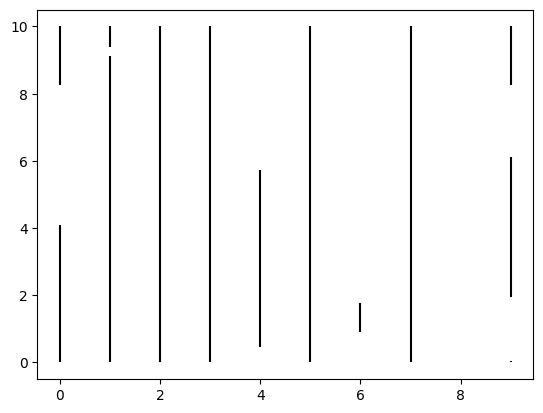

In [246]:
wl = k.get_wl()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.vlines(wl[:, 0], wl[:, 1], wl[:, 2], color="k")

In [247]:
a = 1
b = a
a = 2
print(b)

1


In [248]:
a = 1

In [254]:
b = a

AttributeError: 'int' object has no attribute 'copy'

In [250]:
print(id(a))
print(id(b))

139714816274632
139714816274632


In [279]:
a = [0, 2, 1]
for i in a:
    print(id(i))

139714816274600
139714816274664
139714816274632
